In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.inspection import DecisionBoundaryDisplay

In [4]:

X, y = make_moons(600,noise=0.25)

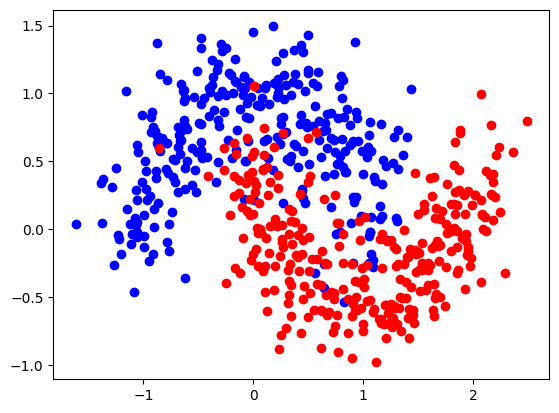

In [5]:
plt.scatter(X[y==0,0],X[y==0,1],c='blue')
plt.scatter(X[y==1,0],X[y==1,1],c='red')

# 3. Lancez un apprentissage de 4 SVM sur ces données :

In [6]:
svm_line=SVC(kernel='linear')
svm_line.fit(X,y)
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X,y)
svm_poly=SVC(kernel='poly')
svm_poly.fit(X,y)
svm_sig=SVC(kernel='sigmoid')
svm_sig.fit(X,y)
pass

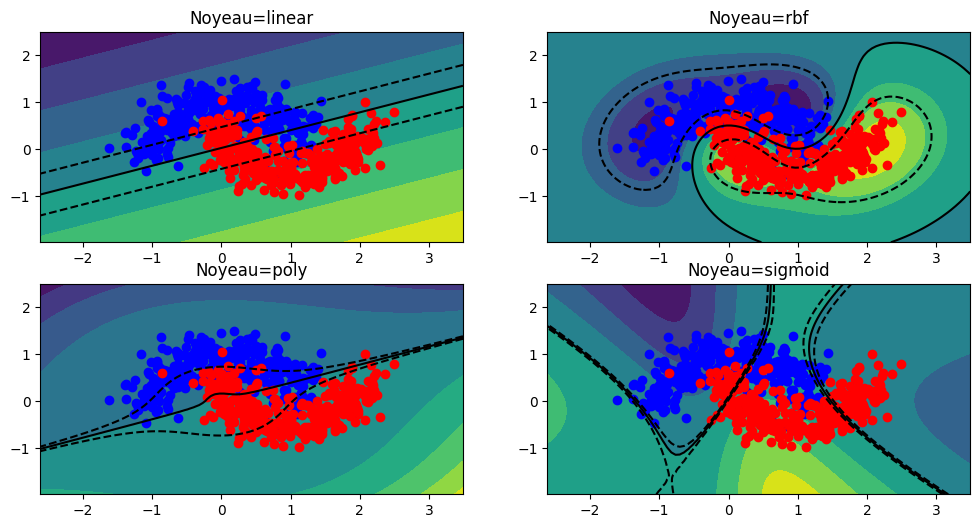

In [7]:
kernel=['linear','rbf','poly','sigmoid']
score=[]
fig , ax = plt.subplots (2, 2, figsize =(12, 6))
ax=ax.flatten()
for i,noyeau in enumerate(kernel):

    clf=SVC(kernel=noyeau)
    clf.fit(X,y)
    score.append(clf.score(X,y)*100)  
    DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[i])
    DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[i] ,
    response_method="decision_function", plot_method="contour", levels =[-1, 0, 1],
    colors =["k", "k", "k"], linestyles =["--", "-", "--"])

    ax[i].set_title(f'Noyeau={noyeau}')
    ax[i].scatter(X[y==0,0],X[y==0,1],c='blue')
    ax[i].scatter(X[y==1,0],X[y==1,1],c='red')
    
plt.show()

# 5. Mesurez les performances de ces modèles sur les données d’apprentissage

<BarContainer object of 4 artists>

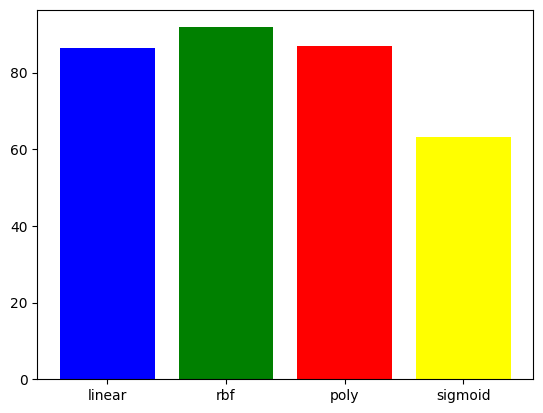

In [8]:
couleurs = ['blue', 'green', 'red','yellow']  
plt.bar(kernel, score, color=couleurs)


# Le noyau rbf s'attaque bien au probleme et fait moins d'erreur sur les données d'appprentissage sa frontiére de decision suit bien la distribution des données du base d'apprentissage. Le noyau sigmoid est le moins performant avec un taux de bonne classification de 60 %. Le noyau polynomiale et le noyau linéaire ont donné de bonnes performances avec des scores superieur à 0.85


# 2. Testez toutes les valeurs de paramètres C et γ suivantes 

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.5,stratify=y)

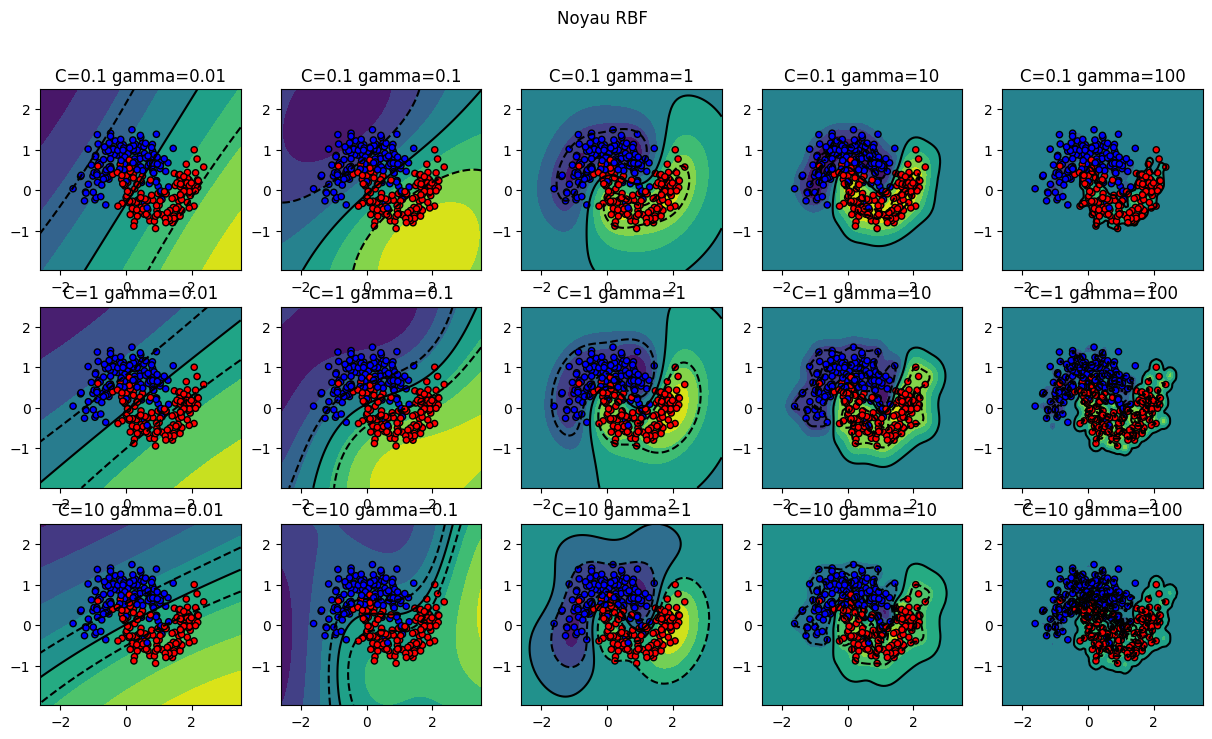

In [10]:
C=[0.1,1,10]
gamma=[0.01, 0.1, 1, 10, 100]
fig , ax = plt.subplots (3, 5, figsize =(15, 8))
ax=ax.flatten()
index=0
color = np.array(["blue","red"])
for c in C:
    for g in gamma :
            clf=SVC(kernel='rbf',C=c,gamma=g)
            clf.fit(X,y)
            score.append(clf.score(X,y)*100)  
            plt.suptitle('Noyau RBF')

            DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[index])
            DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[index] ,
            response_method="decision_function", plot_method="contour", levels =[-1, 0, 1],
            colors =["k", "k", "k"], linestyles =["--", "-", "--"])
            ax[index].set_title(f'C={c} gamma={g}')

            ax[index].scatter(X_test[:, 0], X_test[:, 1], c=color[Y_test], s=20, edgecolors='k')
            index+=1

            

# 4. Donnez votre analyse détaillée des résultats obtenus

## On remarque que l' hyparametre C augmente la taille de la marge c'est plus C est grand plus la marge est importante. L'hyperparametre gamma agit plutot sur la complexité du modele. Avec une valeur de gamma trés elevée(gamma=100) le modéle devient trés complexe et se specialise sur les données d'apprentissage (on peut remarquer que chaque point devient une frontiére de decision) et cela entraine du surapprentissage. Par contre si gamma est tres faible(gamma=0.01) le modéle l'hyperplan devient presque lineaire et le modéle se rapproche à un svm noyau linéaire .Avec un C trés petit on aura du mal à s'attaquer à des probleme  non linéairement separable. 

# Proposez une méthodologie correcte pour trouver les valeurs optimales de C et γ

In [11]:
X_,X_test,y_,Y_test=train_test_split(X,y,test_size=0.33,stratify=y)
X_train,X_valid,Y_train,Y_valid=train_test_split(X_,y_,test_size=0.5,stratify=y_)

In [12]:
C=[0.1,1,10]
gamma=[0.01, 0.1, 1, 10, 100]
best_score=0
best_param=()
for c in C:
    for g in gamma :
            clf=SVC(kernel='rbf',C=c,gamma=g)
            clf.fit(X_train,Y_train)
            new_score=clf.score(X_valid,Y_valid)
            if new_score > best_score:
                  best_score=new_score
                  best_param=(c,g)

In [13]:
print(f'Le meilleur score est {best_score}') 
print(f'La meilleur combinaison est C ={best_param[0]},gamma= {best_param[1]}') 

Le meilleur score est 0.9154228855721394
La meilleur combinaison est C =1,gamma= 10


In [18]:
train=np.concatenate([X_train,X_valid])
label=np.concatenate([Y_train,Y_valid])
clf=SVC(kernel='rbf',C=best_param[0],gamma=best_param[1])
clf.fit(train,label)
s=clf.score(X_test,Y_test)
print(f'Le score sur les données de test est : {s}') 

Le score sur les données de test est : 0.9343434343434344


# 3 Bonus : hyperparamètres du noyau Polynomial

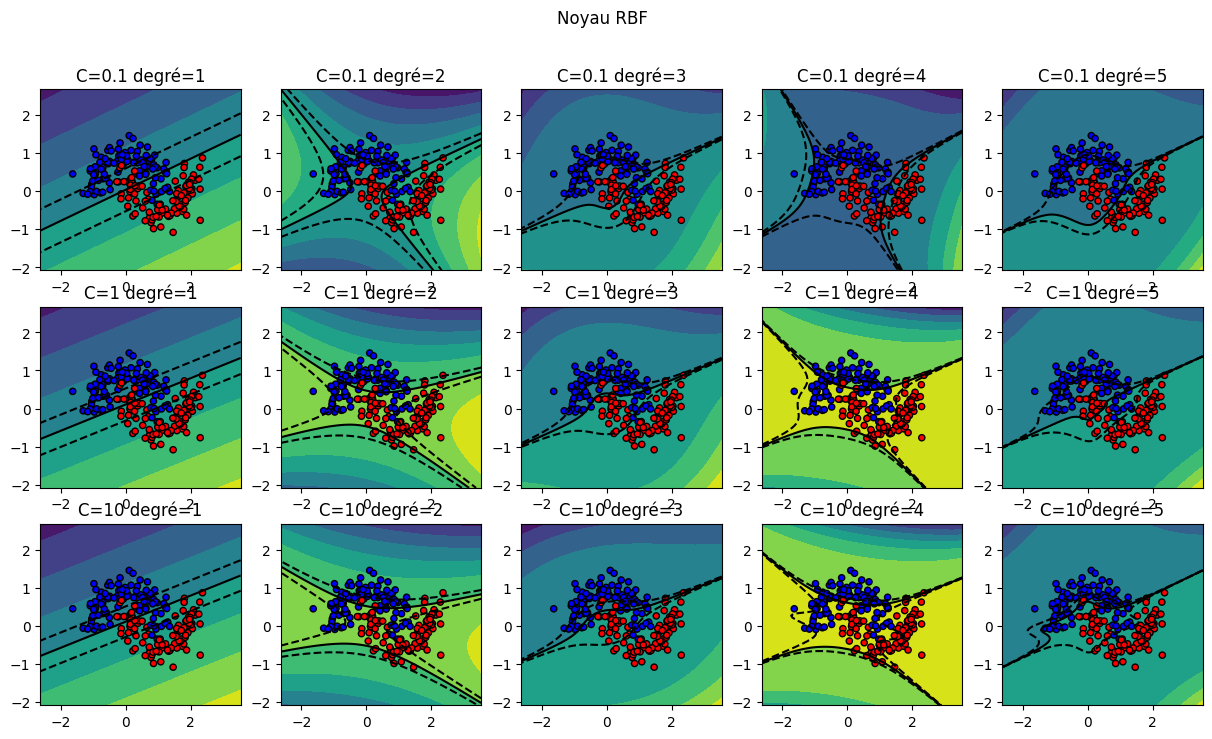

In [ ]:
C=[0.1,1,10]
degre=[1, 2, 3, 4, 5]
fig , ax = plt.subplots (3, 5, figsize =(15, 8))
ax=ax.flatten()
index=0

for c in C:
    for d in degre :
            clf=SVC(kernel='poly',C=c,degree=d)
            clf.fit(X,y)
            score.append(clf.score(X,y)*100)  
            plt.suptitle('Noyau RBF')

            DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[index])
            DecisionBoundaryDisplay.from_estimator(clf , X, ax=ax[index] ,
            response_method="decision_function", plot_method="contour", levels =[-1, 0, 1],
            colors =["k", "k", "k"], linestyles =["--", "-", "--"])
            ax[index].set_title(f'C={c} degré={d}')

            ax[index].scatter(X_test[:, 0], X_test[:, 1], c=color[Y_test], s=20, edgecolors='k')
            index+=1

            